 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [67]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sb
import matplotlib.pyplot as plt
from pathlib import Path


sb.set_theme(context='talk', style='darkgrid', palette='Paired' ,font='sans-serif', font_scale=1, color_codes=True, rc=None)
# %matplotlib inline

In [136]:
#Functions to read and clean data.

#This function reads a CSV file into a DataFrame and if dateIndex is True then it sets Date column to te the index
def read_data(file, dateIndex):
    df = pd.read_csv(file, index_col="Date", parse_dates=True, infer_datetime_format=True) if dateIndex else pd.read_csv(file)
    
    return df

#This function cleans the dataframe passed by clearing all the null values and stripping whitespace from column names
def clean_data(df):
    df = df.dropna()
    df = df.rename(columns=lambda x: x.strip()) #Lambda function to strip whitespace from column names
    return df
        

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [69]:
whale_file = Path('./Resources/whale_returns.csv')

In [70]:
# Reading whale returns
whale_df = read_data(whale_file, True)

In [71]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [72]:
# Drop nulls
whale_df = clean_data(whale_df)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [73]:
algo_file = Path('./Resources/algo_returns.csv')

In [74]:
# Reading algorithmic returns
algo_df = read_data(algo_file, True)

In [75]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [76]:
# Drop nulls
algo_df = clean_data(algo_df)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [77]:
sp_file = Path('./Resources/sp_tsx_history.csv')

In [78]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_df = read_data(sp_file, True)
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [79]:
# Check Data Types
sp_tsx_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2012-10-01 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1818 non-null   object
dtypes: object(1)
memory usage: 28.4+ KB


In [80]:
# Fix Data Types
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$','')
sp_tsx_df['Close'] = sp_tsx_df['Close'].apply(lambda x : float(x.replace(',',''))) #Replacing coma with blank and converting string to float using lambda
sp_tsx_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2012-10-01 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1818 non-null   float64
dtypes: float64(1)
memory usage: 28.4 KB


In [81]:
# Calculate Daily Returns
sp_tsx_df.head()
sp_tsx_dr = sp_tsx_df.pct_change()
sp_tsx_dr.head(20)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
2012-10-10,-0.004982
2012-10-11,0.001763
2012-10-12,-0.002608


In [82]:
# Drop nulls
sp_tsx_dr.isnull().sum()
sp_tsx_dr = clean_data(sp_tsx_dr)

In [83]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_dr.columns = ['SP TXS DR']

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [84]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_dr = pd.concat([whale_df, algo_df, sp_tsx_dr], axis='columns', join='inner')
combined_dr.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TXS DR
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

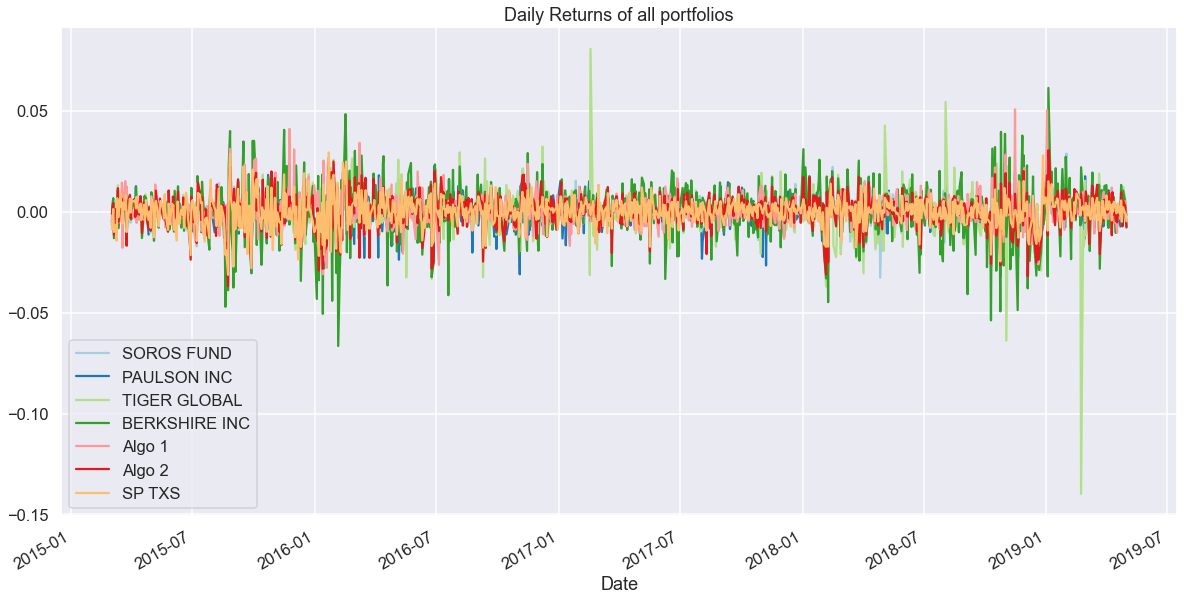

In [139]:
# Plot daily returns of all portfolios

combined_dr_plot = combined_dr['SOROS FUND MANAGEMENT LLC'].plot()
combined_dr_plot = combined_dr['PAULSON & CO.INC.'].plot(ax=combined_dr_plot)
combined_dr_plot = combined_dr['TIGER GLOBAL MANAGEMENT LLC'].plot(ax=combined_dr_plot)
combined_dr_plot = combined_dr['BERKSHIRE HATHAWAY INC'].plot(ax=combined_dr_plot)
combined_dr_plot = combined_dr['Algo 1'].plot(ax=combined_dr_plot)
combined_dr_plot = combined_dr['Algo 2'].plot(ax=combined_dr_plot)
combined_dr_plot = combined_dr['SP TXS DR'].plot(figsize=(20,10), title= 'Daily Returns of all portfolios')

combined_dr_plot.legend(['SOROS FUND', 'PAULSON INC', 'TIGER GLOBAL', 'BERKSHIRE INC', 'Algo 1', 'Algo 2', 'SP TXS'])

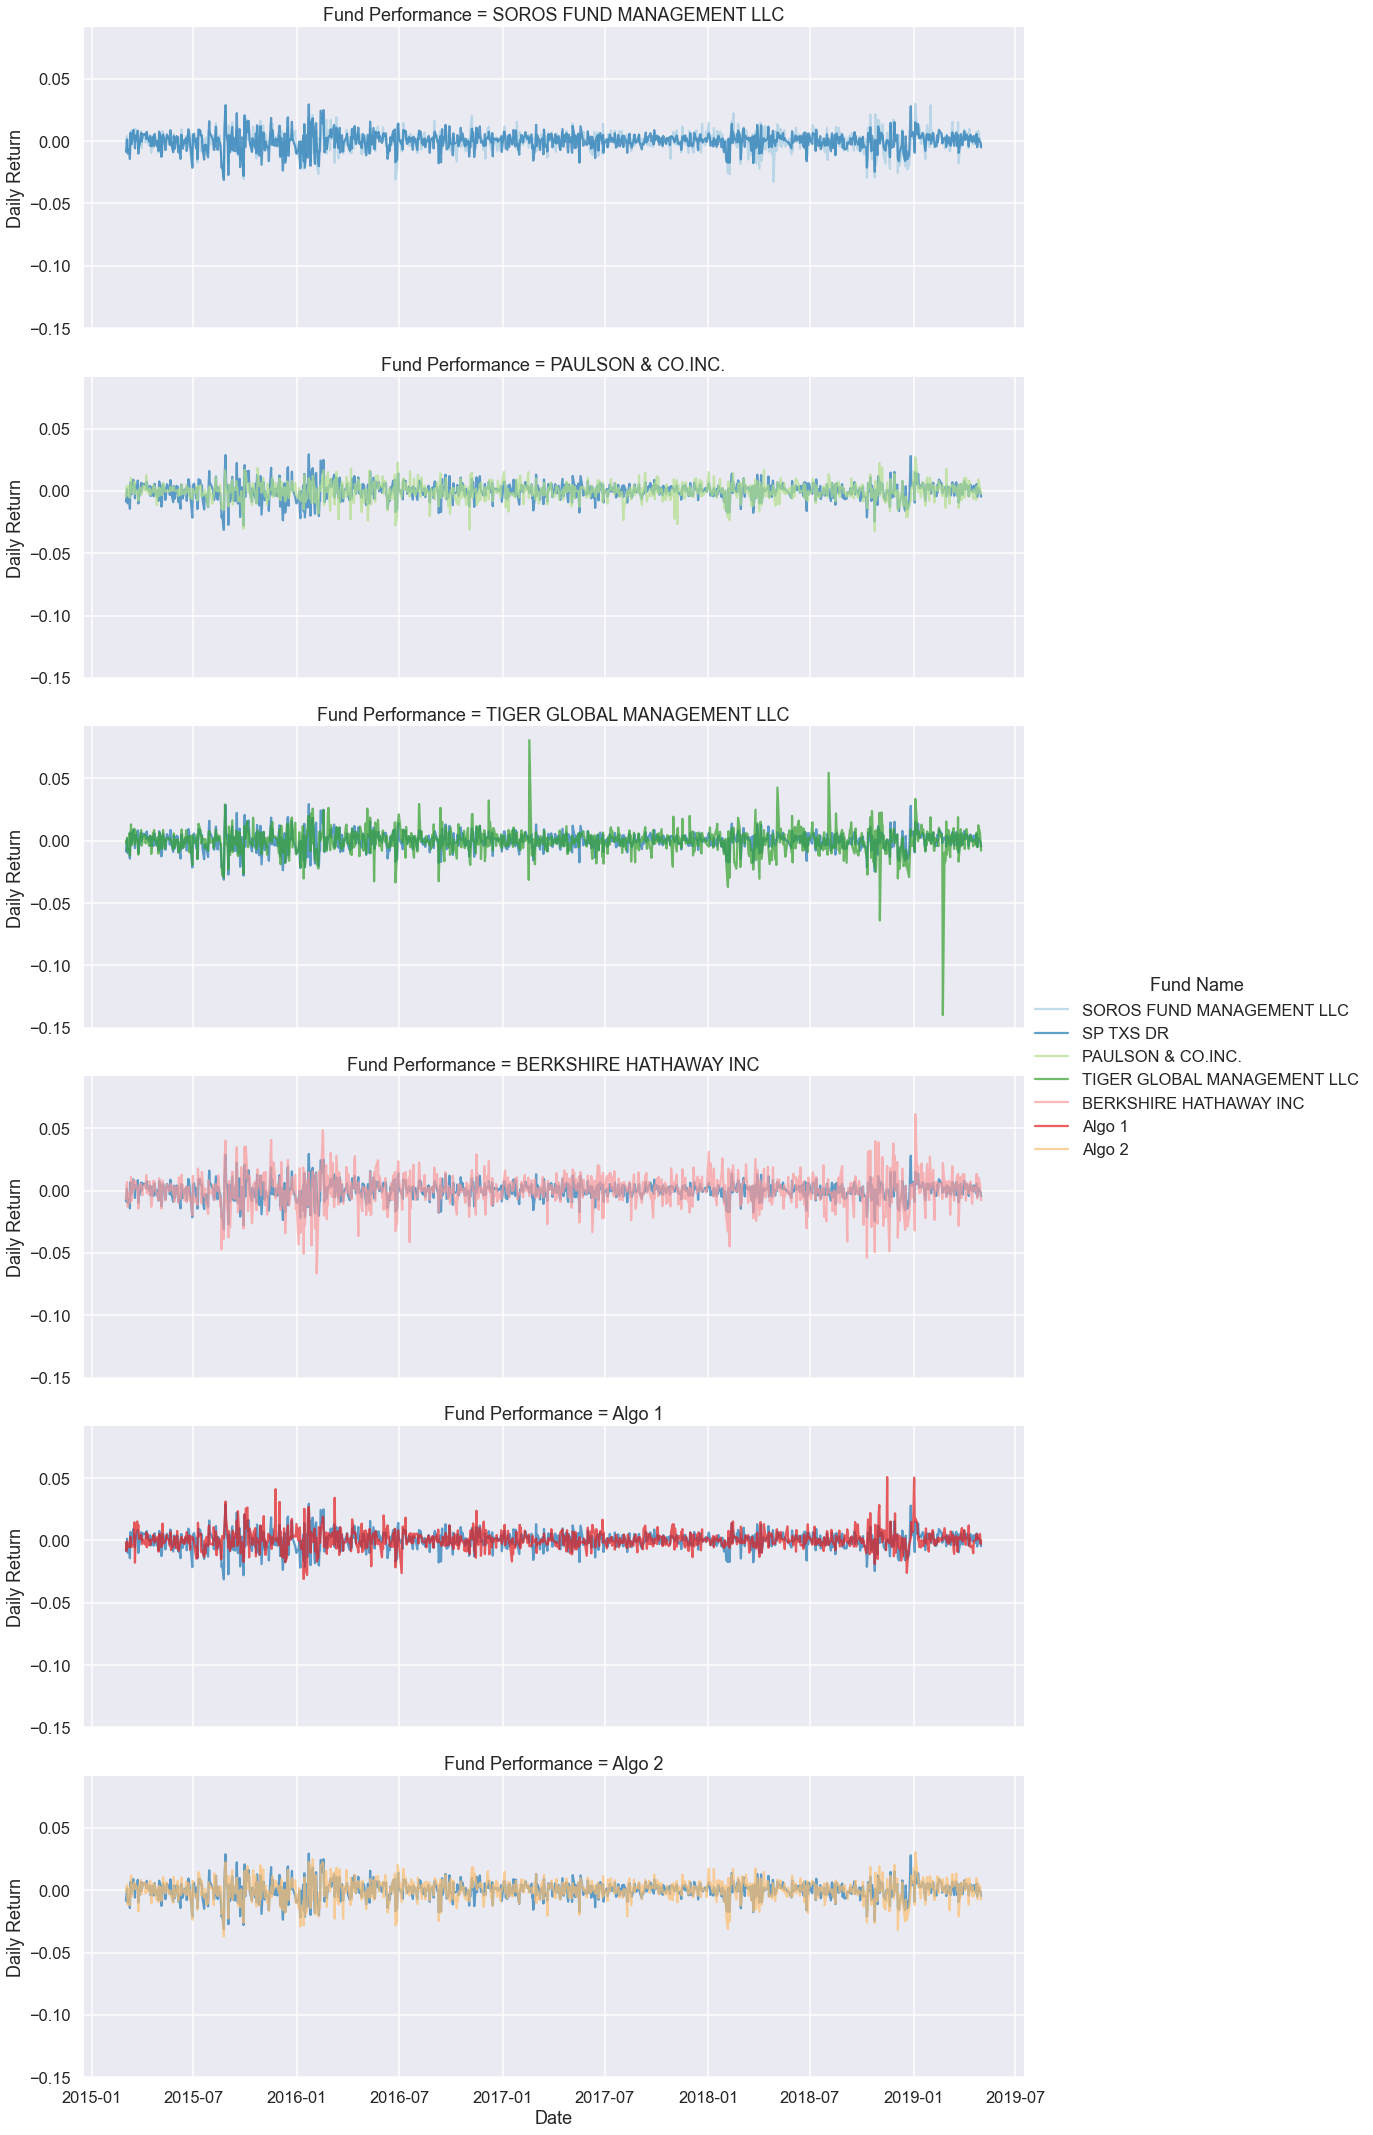

In [141]:
# this logic separately plots each Daily return of each fund paired with Daily return of SP TXS. This allows us to look at each fund individually to measure performance in comparison to SP TSX

#This function extract values for a fund name and SP TSX and creates a dataframe with an additional column Fund Performance
def get_melted_DF(df, fund_name):
    df = pd.melt(df.reset_index(), id_vars=['Date'], var_name='Fund Name', value_name='Daily Return', value_vars=[fund_name, 'SP TXS DR'])
    df['Fund Performance'] = fund_name
    return df

# Merges all newly created data frames
def merge_DF(df_tomerge, df):
    return df.merge(df_tomerge, how='outer', on=['Date','Fund Name', 'Daily Return', 'Fund Performance'])

paulson_melted_df = get_melted_DF(combined_dr, 'PAULSON & CO.INC.')
soros_melted_df = get_melted_DF(combined_dr, 'SOROS FUND MANAGEMENT LLC')
tiger_melted_df = get_melted_DF(combined_dr, 'TIGER GLOBAL MANAGEMENT LLC')
berkshire_melted_df = get_melted_DF(combined_dr, 'BERKSHIRE HATHAWAY INC')
algo_1_melted_df = get_melted_DF(combined_dr, 'Algo 1')
algo_2_melted_df = get_melted_DF(combined_dr, 'Algo 2')

combined_melted_df = merge_DF(paulson_melted_df, soros_melted_df)
combined_melted_df = merge_DF(tiger_melted_df, combined_melted_df)
combined_melted_df = merge_DF(berkshire_melted_df, combined_melted_df)
combined_melted_df = merge_DF(algo_1_melted_df, combined_melted_df)
combined_melted_df = merge_DF(algo_2_melted_df, combined_melted_df)

# Subplots each fund comparison with SP TSX along Fund performance and Fund name
graphs = sb.FacetGrid(combined_melted_df, hue='Fund Name', row='Fund Performance', height=5, aspect=3)
graphs.map(sb.lineplot, 'Date', 'Daily Return', alpha=.7)
graphs.add_legend()


#### Calculate and Plot cumulative returns.

Text(0.5, 0, 'Date')

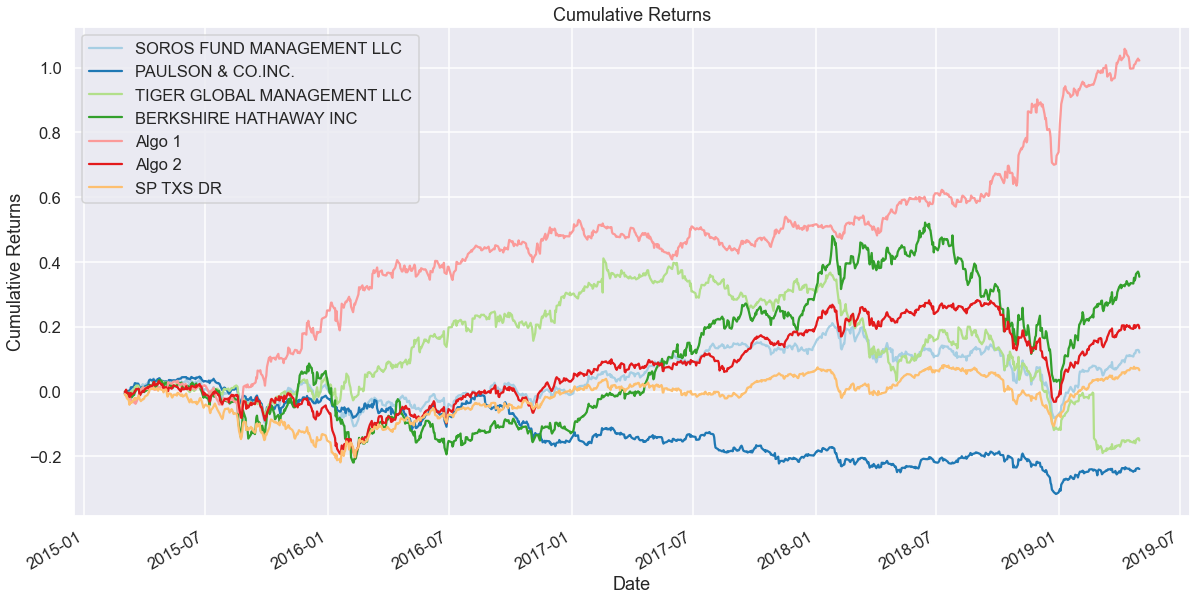

In [142]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_dr).cumprod() - 1
cumulative_returns

# Plot cumulative returns
plot_cr = cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")
plot_cr.set_ylabel('Cumulative Returns')
plot_cr.set_xlabel('Date')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


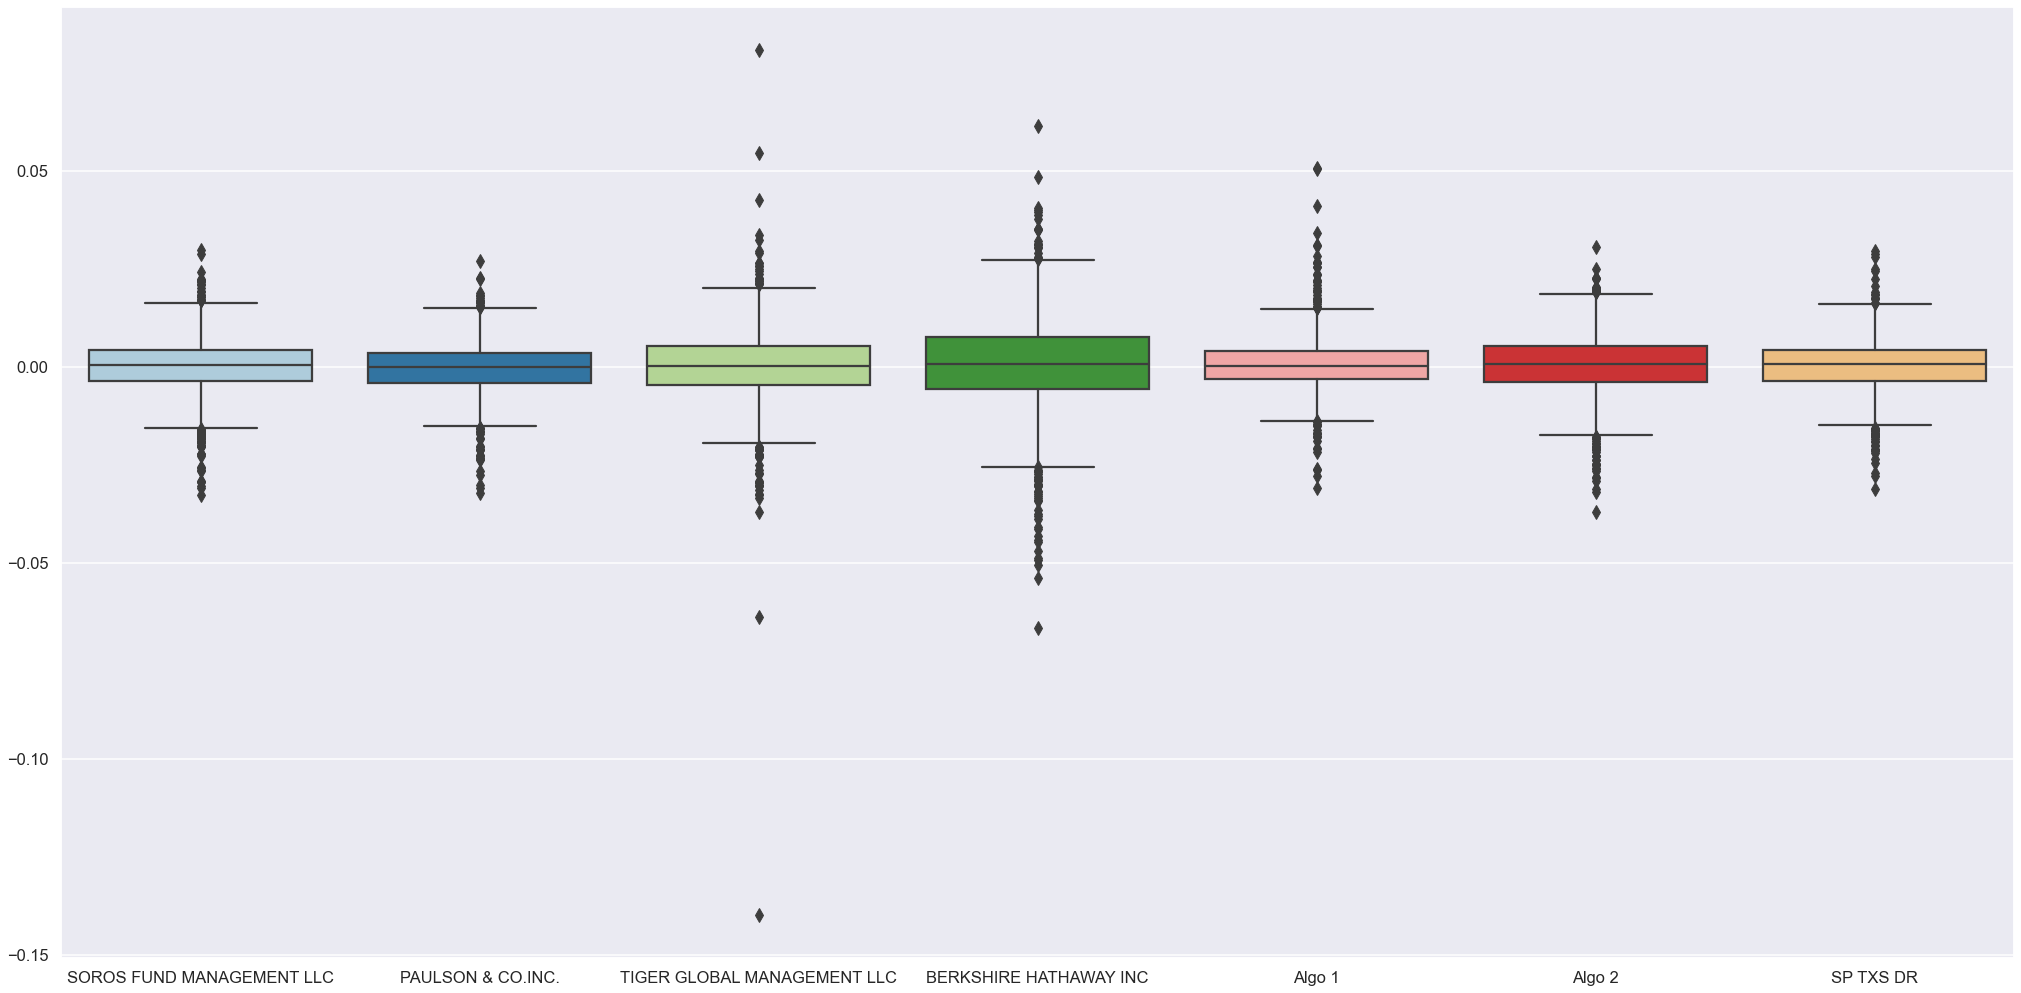

In [144]:
# Box plot to visually show risk
f, ax = plt.subplots(figsize=(35, 17.5))
box_plot = sb.boxplot(data=combined_dr, fliersize=10)

### Calculate Standard Deviations

In [89]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_dr.std().sort_values(ascending=False)
combined_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
SP TXS DR                      0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [90]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_std = combined_dr['SP TXS DR'].std()
sp_std
# Determine which portfolios are riskier than the S&P TSX 60

0.007034167748577725

### Calculate the Annualized Standard Deviation

In [91]:
# Calculate the annualized standard deviation (252 trading days)
annulised_combined_std = combined_std * np.sqrt(252)
annulised_combined_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
SP TXS DR                      0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

Text(0, 0.5, '21 Days Rolling Standard Deviation')

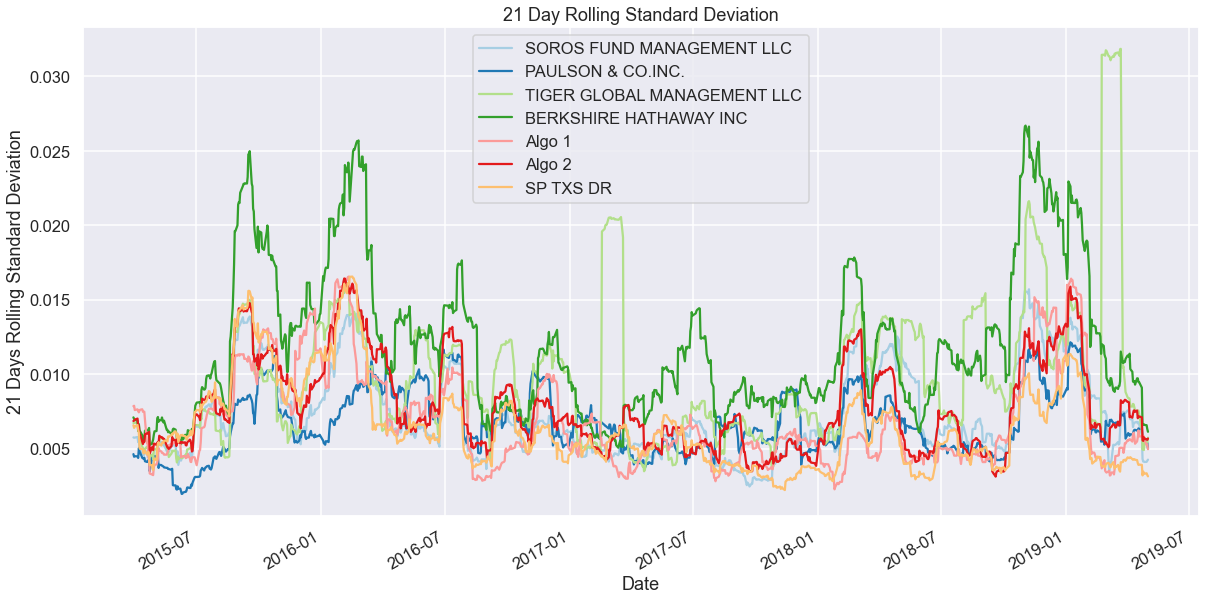

In [92]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_std_21 = combined_dr.rolling(window=21).std()

# Plot the rolling standard deviation
plot_std_21 = combined_std_21.plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")
plot_std_21.set_xlabel('Date')
plot_std_21.set_ylabel('21 Days Rolling Standard Deviation')

### Calculate and plot the correlation

In [93]:
# Calculate the correlation
combined_corr = combined_dr.corr()
# Display de correlation matrix
combined_corr.style.background_gradient(cmap='coolwarm')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TXS DR
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SP TXS DR,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

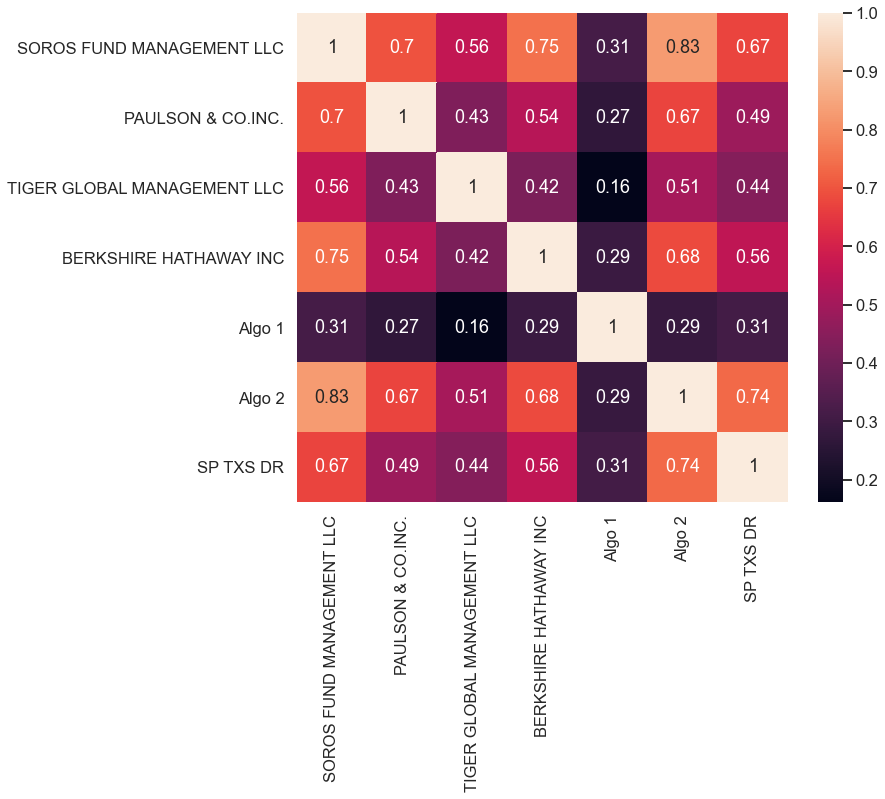

In [128]:
f, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(combined_corr, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

Text(0, 0.5, 'Beta')

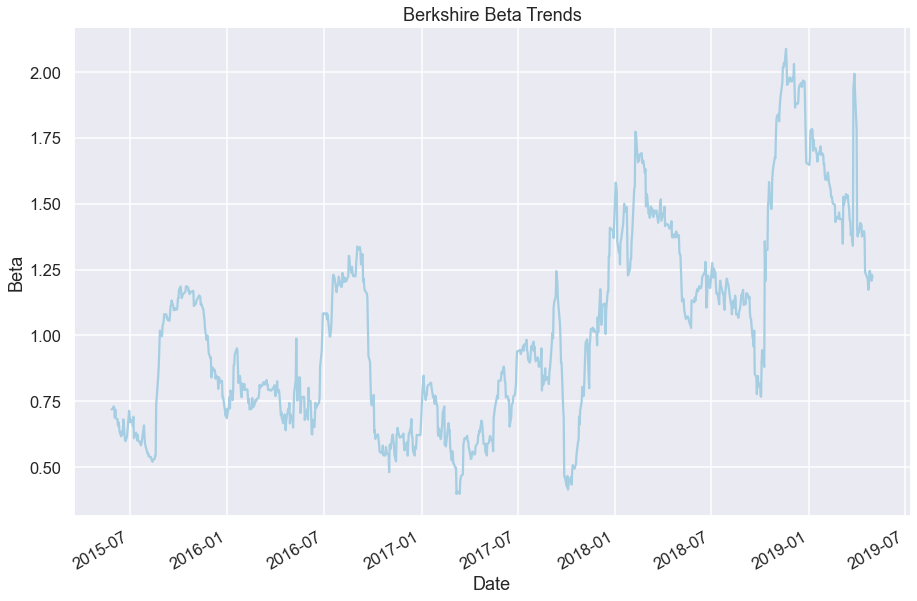

In [94]:
# Calculate covariance of a single portfolio
covar_berkshire_60 = combined_dr['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_dr['SP TXS DR'])

# Calculate variance of S&P TSX
variance_sp_60 = combined_dr['SP TXS DR'].rolling(window=60).var()

# Computing beta
beta_berkshire_60 = covar_berkshire_60 / variance_sp_60

# Plot beta trend
plot_beta_60 = beta_berkshire_60.plot(figsize=(15,10), title="Berkshire Beta Trends")
plot_beta_60.set_ylabel('Beta')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [95]:
# Use `ewm` to calculate the rolling window
combined_ewm_21 = combined_dr.ewm(halflife=21).mean()
combined_ewm_21

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TXS DR
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.005908
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.003410
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005133
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.005436
...,...,...,...,...,...,...,...
2019-04-25,0.001277,0.000032,-0.001058,0.001860,0.000625,0.000876,0.001018
2019-04-26,0.001500,0.000329,-0.000622,0.002138,0.000702,0.001018,0.001058
2019-04-29,0.001492,0.000406,-0.000399,0.002238,0.000848,0.001077,0.000998


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [96]:
# Annualized Sharpe Ratios
combine_spr = (combined_dr.mean() * 252) /(combined_std * np.sqrt(252))
combine_spr

Algo 1                         1.491514
Algo 2                         0.396817
BERKSHIRE HATHAWAY INC         0.467045
PAULSON & CO.INC.             -0.547594
SOROS FUND MANAGEMENT LLC      0.286709
SP TXS DR                      0.195550
TIGER GLOBAL MANAGEMENT LLC   -0.144455
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

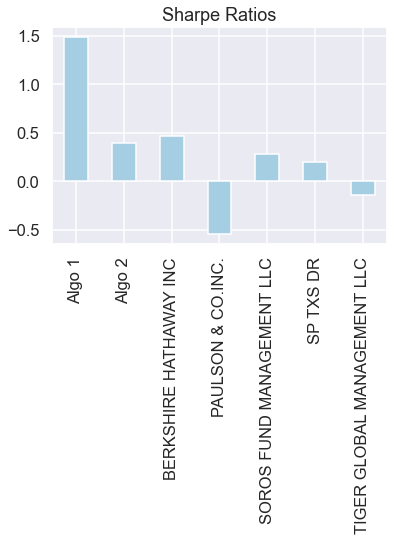

In [97]:
# Visualize the sharpe ratios as a bar plot
combine_spr.plot.bar(title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Based on the graph above, it can be concluded that algorithmic strateties have performed better by taking more risks as compared to S&P TXS 60 and other whale portfolios.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [98]:
# Reading data from 1st stock
alphabet_file = Path('./Resources/alphabet_historical.csv')
alphabet_df = read_data(alphabet_file, True)
alphabet_df.columns = ['Alphabet_Close']
alphabet_df

,Alphabet_Close
Date,
2017-01-03,808.01
2017-01-04,807.77
2017-01-05,813.02
2017-01-06,825.21
2017-01-09,827.18
...,...
2018-12-21,991.25
2018-12-24,984.67
2018-12-26,1047.85


In [99]:
# Reading data from 2nd stock
tesla_file = Path('./Resources/tesla_historical.csv')
tesla_df = read_data(tesla_file, True)
tesla_df.columns = [ 'Tesla_Close']
tesla_df

,Tesla_Close
Date,
2017-01-03,43.40
2017-01-04,45.40
2017-01-05,45.35
2017-01-06,45.80
2017-01-09,46.26
...,...
2018-12-21,63.95
2018-12-24,59.08
2018-12-26,65.22


In [100]:
# Reading data from 3rd stock
apple_file = Path('./Resources/apple_historical.csv')
apple_df = read_data(apple_file, True)
apple_df.columns = [ 'Apple_Close']
apple_df

,Apple_Close
Date,
2017-01-03,29.04
2017-01-04,29.01
2017-01-05,29.15
2017-01-06,29.48
2017-01-09,29.75
...,...
2018-12-21,37.68
2018-12-24,36.71
2018-12-26,39.29


In [101]:
# Combine all stocks in a single DataFrame
custom_combined_df = pd.concat([alphabet_df, tesla_df, apple_df], axis='columns', join='inner')
custom_combined_df

,Alphabet_Close,Tesla_Close,Apple_Close
Date,,,
2017-01-03,808.01,43.40,29.04
2017-01-04,807.77,45.40,29.01
2017-01-05,813.02,45.35,29.15
2017-01-06,825.21,45.80,29.48
2017-01-09,827.18,46.26,29.75
...,...,...,...
2018-12-21,991.25,63.95,37.68
2018-12-24,984.67,59.08,36.71
2018-12-26,1047.85,65.22,39.29


In [102]:
# Reset Date index
custom_combined_df = custom_combined_df.reset_index()
custom_combined_df

,Date,Alphabet_Close,Tesla_Close,Apple_Close
0,2017-01-03,808.01,43.40,29.04
1,2017-01-04,807.77,45.40,29.01
2,2017-01-05,813.02,45.35,29.15
3,2017-01-06,825.21,45.80,29.48
4,2017-01-09,827.18,46.26,29.75
...,...,...,...,...
496,2018-12-21,991.25,63.95,37.68
497,2018-12-24,984.67,59.08,36.71
498,2018-12-26,1047.85,65.22,39.29
499,2018-12-27,1052.90,63.23,39.04


In [103]:
# Reorganize portfolio data by having a column per symbol
custom_combined_df = pd.pivot_table(custom_combined_df, index=['Date'])
custom_combined_df

,Alphabet_Close,Apple_Close,Tesla_Close
Date,,,
2017-01-03,808.01,29.04,43.40
2017-01-04,807.77,29.01,45.40
2017-01-05,813.02,29.15,45.35
2017-01-06,825.21,29.48,45.80
2017-01-09,827.18,29.75,46.26
...,...,...,...
2018-12-21,991.25,37.68,63.95
2018-12-24,984.67,36.71,59.08
2018-12-26,1047.85,39.29,65.22


In [104]:
# Calculate daily returns
custom_combined_dr = custom_combined_df.pct_change()
custom_combined_dr
# Drop NAs
custom_combined_dr = clean_data(custom_combined_dr)
custom_combined_dr.columns = ['Alphabet', 'Tesla', 'Apple']
# Display sample data
custom_combined_dr.head(5)

,Alphabet,Tesla,Apple
Date,,,
2017-01-04,-0.000297,-0.001033,0.046083
2017-01-05,0.006499,0.004826,-0.001101
2017-01-06,0.014993,0.011321,0.009923
2017-01-09,0.002387,0.009159,0.010044
2017-01-10,-0.001414,0.001008,-0.006269


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [105]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_weighted_returns = custom_combined_dr.dot(weights)
# Display sample data
custom_weighted_returns.head(5)

Date
2017-01-04    0.014918
2017-01-05    0.003408
2017-01-06    0.012079
2017-01-09    0.007197
2017-01-10   -0.002225
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [106]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_dr = pd.concat([combined_dr, custom_combined_dr], axis='columns', join='inner')
all_portfolio_dr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TXS DR,Alphabet,Tesla,Apple
Date,,,,,,,,,,
2017-01-04,0.011581,0.007029,-0.001011,0.012204,0.012510,0.014701,0.007383,-0.000297,-0.001033,0.046083
2017-01-05,0.003079,0.004107,-0.004264,0.016092,-0.003955,-0.001872,0.004500,0.006499,0.004826,-0.001101
2017-01-06,0.003561,-0.013250,-0.001213,0.005667,-0.000364,0.000051,-0.005808,0.014993,0.011321,0.009923
2017-01-09,-0.000458,0.002007,-0.004540,-0.002642,0.002775,-0.006277,-0.006911,0.002387,0.009159,0.010044
2017-01-10,-0.001490,0.000394,-0.000718,0.010586,0.007669,0.006618,0.002426,-0.001414,0.001008,-0.006269
...,...,...,...,...,...,...,...,...,...,...
2018-12-20,-0.016673,-0.008347,-0.011045,-0.025463,-0.026095,-0.023793,-0.008573,-0.011473,-0.025112,-0.052711
2018-12-21,-0.022720,-0.020980,-0.022570,-0.028892,-0.017888,-0.021636,-0.014590,-0.031585,-0.039021,0.013792
2018-12-24,-0.019152,-0.011786,-0.029165,-0.020181,-0.003938,-0.014745,-0.011141,-0.006638,-0.025743,-0.076153


In [145]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# There is no need to drop nulls because inner joining would only select the dates where there is data across all columns

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [108]:
# Calculate the annualized `std`
all_portfolio_std = all_portfolio_dr.std().sort_values(ascending=False)
all_portfolio_std_annulised = all_portfolio_std * np.sqrt(252)
all_portfolio_std_annulised

Apple                          0.478427
Tesla                          0.235285
Alphabet                       0.223773
BERKSHIRE HATHAWAY INC         0.193938
TIGER GLOBAL MANAGEMENT LLC    0.167408
SOROS FUND MANAGEMENT LLC      0.122300
Algo 2                         0.117574
PAULSON & CO.INC.              0.105157
Algo 1                         0.102279
SP TXS DR                      0.090896
dtype: float64

### Calculate and plot rolling `std` with 21-day window

Text(0, 0.5, '21 Days Rolling Standard Deviation')

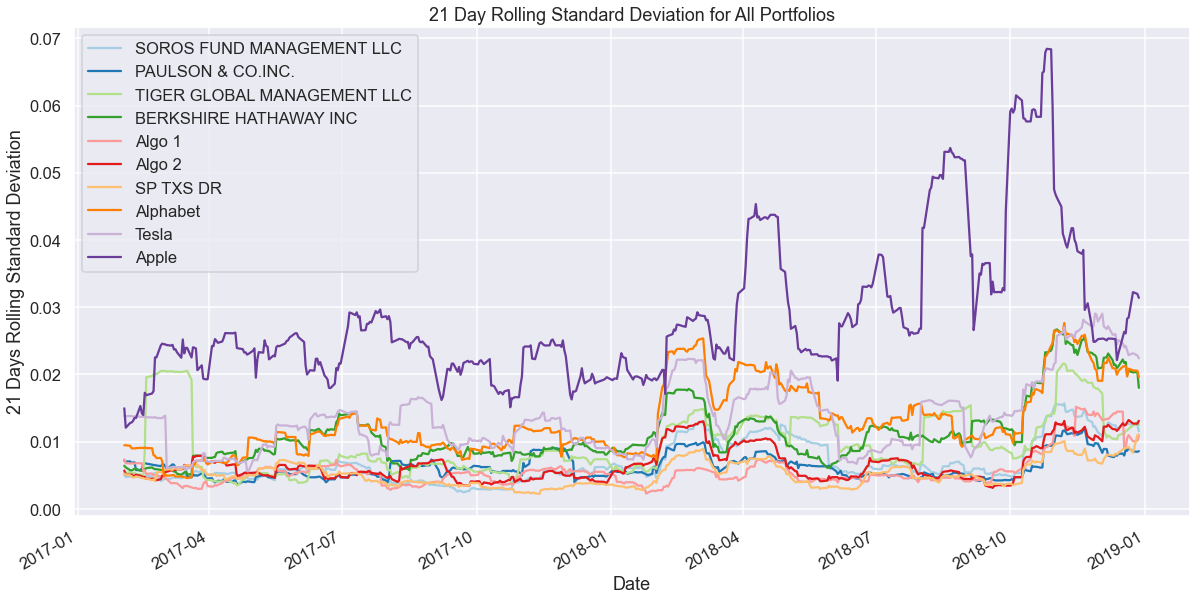

In [109]:
# Calculate rolling standard deviation
all_portfolio_std_21 = all_portfolio_dr.rolling(window=21).std()

# Plot the rolling standard deviation
plot_std_21 = all_portfolio_std_21.plot(figsize=(20,10), title="21 Day Rolling Standard Deviation for All Portfolios")
plot_std_21.set_xlabel('Date')
plot_std_21.set_ylabel('21 Days Rolling Standard Deviation')


### Calculate and plot the correlation

In [110]:
# Calculate and plot the correlation
all_portfolio_corr = all_portfolio_dr.corr()

all_portfolio_corr.style.background_gradient(cmap='coolwarm')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TXS DR,Alphabet,Tesla,Apple
SOROS FUND MANAGEMENT LLC,1.000000,0.661664,0.532258,0.750525,0.277787,0.789716,0.621614,0.600598,0.535965,0.299202
PAULSON & CO.INC.,0.661664,1.000000,0.468560,0.543610,0.261773,0.702336,0.534771,0.441503,0.426718,0.215646
TIGER GLOBAL MANAGEMENT LLC,0.532258,0.468560,1.000000,0.403335,0.087759,0.502609,0.396289,0.393194,0.416548,0.221377
BERKSHIRE HATHAWAY INC,0.750525,0.543610,0.403335,1.000000,0.242638,0.725329,0.577250,0.744356,0.603407,0.361389
Algo 1,0.277787,0.261773,0.087759,0.242638,1.000000,0.283958,0.283779,0.184976,0.192150,0.089218
Algo 2,0.789716,0.702336,0.502609,0.725329,0.283958,1.000000,0.715601,0.620316,0.568949,0.309292
SP TXS DR,0.621614,0.534771,0.396289,0.577250,0.283779,0.715601,1.000000,0.516339,0.474947,0.203566
Alphabet,0.600598,0.441503,0.393194,0.744356,0.184976,0.620316,0.516339,1.000000,0.607143,0.293815
Tesla,0.535965,0.426718,0.416548,0.603407,0.192150,0.568949,0.474947,0.607143,1.000000,0.284138
Apple,0.299202,0.215646,0.221377,0.361389,0.089218,0.309292,0.203566,0.293815,0.284138,1.000000


<AxesSubplot:>

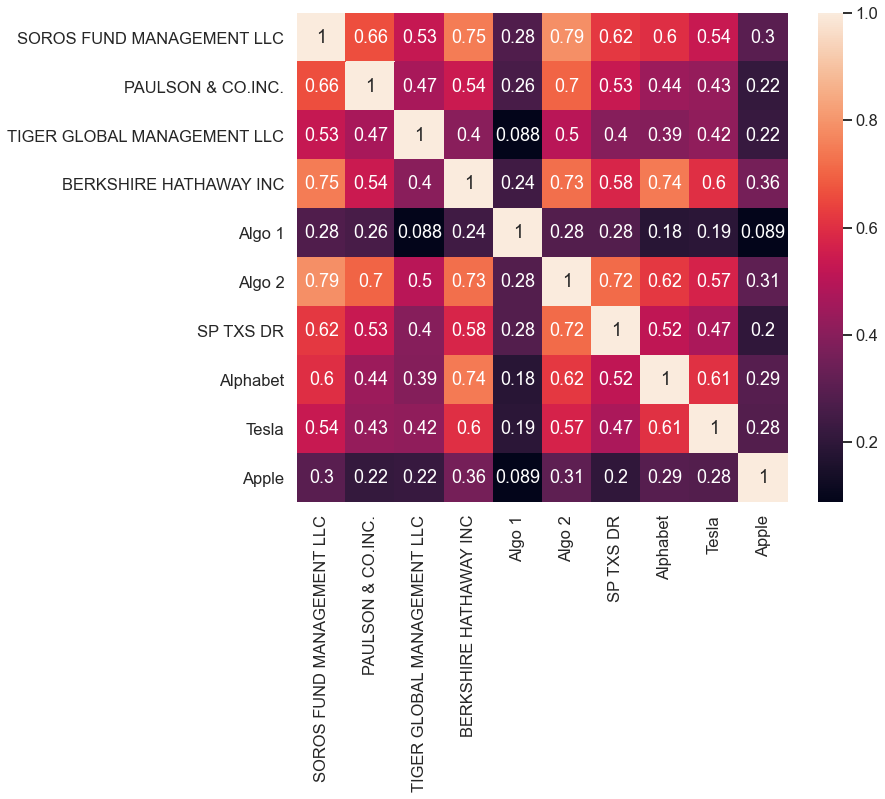

In [147]:
f, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(all_portfolio_corr, annot=True)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

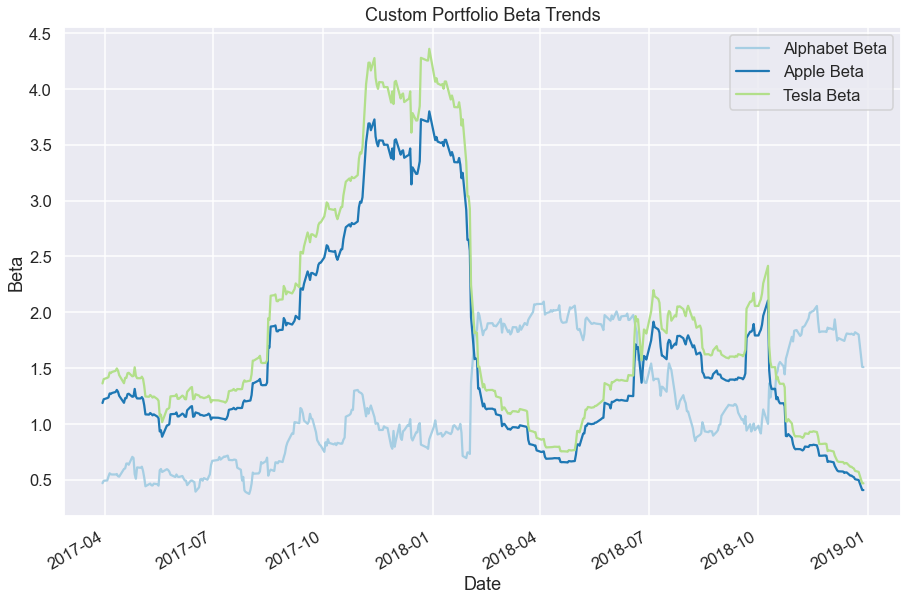

In [111]:
# Calculate and plot Beta
covar_alphabet_60 = all_portfolio_dr['Alphabet'].rolling(window=60).cov(all_portfolio_dr['SP TXS DR'])
covar_apple_60 = all_portfolio_dr['Apple'].cov(all_portfolio_dr['SP TXS DR'])
covar_tesla_60 = all_portfolio_dr['Tesla'].cov(all_portfolio_dr['SP TXS DR'])

# Calculate variance of S&P TSX
variance_sp_60 = all_portfolio_dr['SP TXS DR'].rolling(window=60).var()

# Computing beta
beta_alphabet_60 = covar_alphabet_60 / variance_sp_60
beta_apple_60 = covar_apple_60 / variance_sp_60
beta_tesla_60 = covar_tesla_60 / variance_sp_60


# Plot beta trend
plot_beta_60 = beta_alphabet_60.plot()
plot_beta_60 = beta_apple_60.plot(ax=plot_beta_60)
plot_beta_60 = beta_tesla_60.plot(ax = plot_beta_60, figsize=(15,10), title="Custom Portfolio Beta Trends")
plot_beta_60.set_ylabel('Beta')
plot_beta_60.legend(['Alphabet Beta', 'Apple Beta', 'Tesla Beta'])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [112]:
# Calculate Annualzied Sharpe Ratios
all_portfolio_spr = (all_portfolio_dr.mean() * 252) /(all_portfolio_dr.std() * np.sqrt(252))
all_portfolio_spr

SOROS FUND MANAGEMENT LLC     -0.251624
PAULSON & CO.INC.             -1.089800
TIGER GLOBAL MANAGEMENT LLC   -1.101586
BERKSHIRE HATHAWAY INC         0.520550
Algo 1                         0.768807
Algo 2                        -0.201699
SP TXS DR                     -0.440867
Alphabet                       0.544377
Tesla                          0.581450
Apple                          0.788867
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

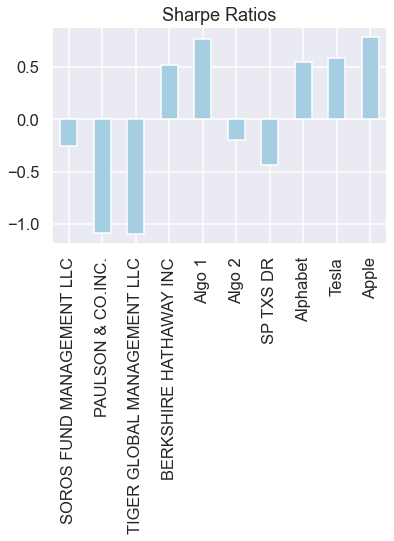

In [114]:
# Visualize the sharpe ratios as a bar plot
all_portfolio_spr.plot.bar(title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

Based on the above graph, between 1st January 2017 and 31st December 2018, my portfolio comprising of Alphabet INC, Tesla INC and Apple INC have performed on par with Algorithmic portfolio comprising of Algo 1 and Algo 2 funds. But the portfoliohas fared better compared to S&P TSX market and other whale funds. It has provided good returns for greater risks taken.